# Twitter-Analyse for DHd-conference 2022 #
This project aims to analyse the tweets with the hashtag #DHd2022. This years conference has the title "Cultures of digital memory". As Twitter is nowadays producing millions of sources of individual actions, we have to ask ourselfs how does this influences our commemorative culture and what does it mean for culture of digital memory.

With this notebook I try to show what traces of action and interaction a single event like this conference leaves on Twitter and how we can analyse it.

In [1]:
import datetime

from load_tweets import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 5)
download_tweets = False

In [2]:
"""
Connecting to the API-Client and downloading the tweets with #DHd2022.
"""
tweetsDHd = None
if download_tweets:
    #api_client = connect_api('twitter_api.ini')
    next_token = "start"
    tweetsDHd = []
    while next_token is not None and str(next_token) != '':
        next_token = None if next_token == "start" else next_token
        tmp = search_tweets('#DHd2022', next_token)
        if tmp is None:
            tweetsDHd = None
            break
        try:
            next_token = tmp["meta"]["next_token"]
        except KeyError:
            next_token = None
        print('Downloaded %s Tweets' % tmp["meta"]["result_count"])
        tweetsDHd.append(tmp)

    #with open('data/tweets_DHd2022.json', 'w') as f:
    #    json.dump(tweetsDHd, f)


In [3]:
try:
    tweets_data = pd.read_csv("data/tweets_data.csv", encoding='utf8', dtype={'id': str})
    tweets_user = pd.read_csv("data/twitter_users.csv", encoding='utf8', dtype={'id': str})
except FileNotFoundError:
    tweets_data = None
    tweets_user = None
if tweetsDHd is not None:
    for r in tweetsDHd:
        if tweets_data is None:
            tweets_data = pd.DataFrame(r["data"])
        else:
            tmp = pd.DataFrame(r["data"])
            for _,v in tmp.iterrows():
                if v['id'] not in tweets_data['id'].tolist():
                    tweets_data = tweets_data.append(v)
                else: 
                    continue
        if tweets_user is None:
            tweets_user = pd.DataFrame(r["includes"]["users"])
        else:
            tmp = pd.DataFrame(r["includes"]["users"])
            for _,v in tmp.iterrows():
                if v['id'] not in tweets_user['id'].tolist():
                    tweets_user = tweets_user.append(v)
        print(r["includes"].keys())
    tweets_data.to_csv("data/tweets_data.csv", encoding='utf8', index=False)
    tweets_user.to_csv("data/twitter_users.csv", encoding='utf8', index=False)


In [4]:
tweets_data = convert_datetime(tweets_data, 'created_at')
tweets_user = convert_datetime(tweets_user, 'created_at')
tweets_data

,entities,lang,author_id,source,public_metrics,in_reply_to_user_id,created_at,id,text,geo
0,"{'urls': [{'start': 87, 'end': 110, 'url': 'ht...",de,810555350944464896,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",8.105554e+17,2022-02-23 10:46:13,1496436224738869250,immer noch anmelden. Bis zum 28.2. ist die Anm...,NaN
1,"{'hashtags': [{'start': 236, 'end': 244, 'tag'...",de,810555350944464896,Twitter Web App,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",8.105554e+17,2022-02-23 10:46:12,1496436223291936772,unseren Gather-Raum. Auch das Kulturelle soll ...,NaN
2,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",en,911193053641273344,TweetDeck,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",NaN,2022-02-23 10:41:32,1496435048454709249,RT @UWuttke: 📢 Thursday the one and only @etot...,NaN
3,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",de,1421172834,TweetDeck,"{'retweet_count': 5, 'reply_count': 0, 'like_c...",NaN,2022-02-23 10:35:59,1496433653022437376,RT @UWuttke: Ich freue mich schon riesig auf d...,NaN
4,"{'hashtags': [{'start': 73, 'end': 81, 'tag': ...",de,391926702,TweetDeck,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",NaN,2022-02-23 09:55:27,1496423448666587140,RT @msiemund: Vorm Schlafengehen noch ein klei...,NaN
...,...,...,...,...,...,...,...,...,...,...
3778,"{'mentions': [{'start': 127, 'end': 135, 'user...",de,1341726401242816516,Twitter for iPhone,"{'retweet_count': 2, 'reply_count': 1, 'like_c...",NaN,2022-03-18 11:18:35,1504779291048951809,🤩😍🎉 gerade angekommen: mein #dhd2022 #GatherCh...,NaN
3779,"{'hashtags': [{'start': 252, 'end': 261, 'tag'...",en,629155988,Twitter Web App,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",6.291560e+08,2022-03-18 11:11:06,1504777408049733633,3/3 And the problem only increases with the nu...,NaN
3780,"{'mentions': [{'start': 3, 'end': 19, 'usernam...",de,402625250,TweetDeck,"{'retweet_count': 7, 'reply_count': 0, 'like_c...",NaN,2022-03-18 08:20:04,1504734368962600965,RT @DominikBoenisch: Das Poster zu #Trainingth...,NaN
3781,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",de,1493004805689724928,Twitter Web App,"{'retweet_count': 10, 'reply_count': 0, 'like_...",NaN,2022-03-18 00:27:48,1504615518766088199,RT @uclab_potsdam: Mehr Informationen zum Proj...,NaN


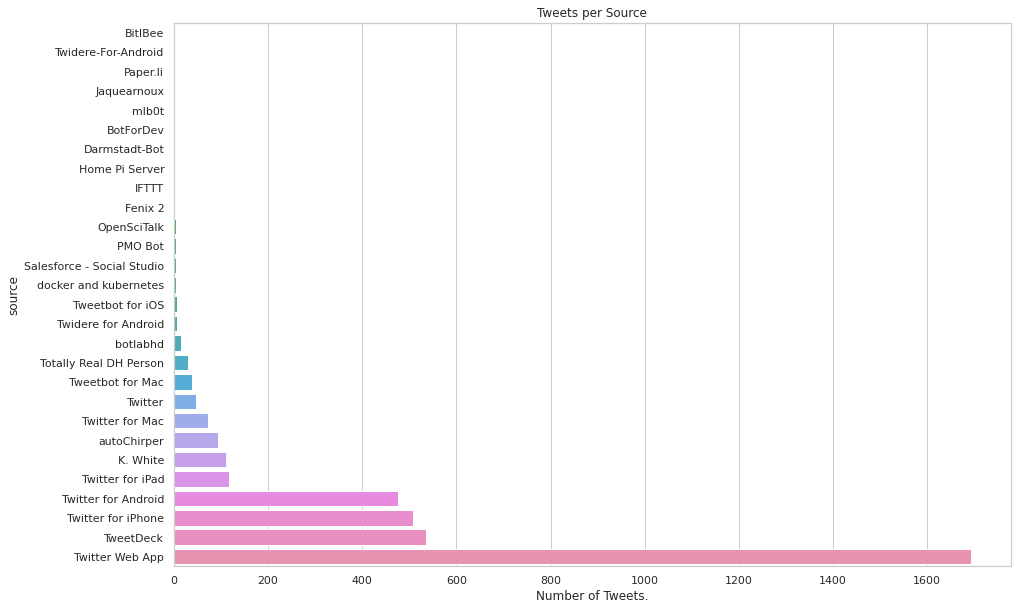

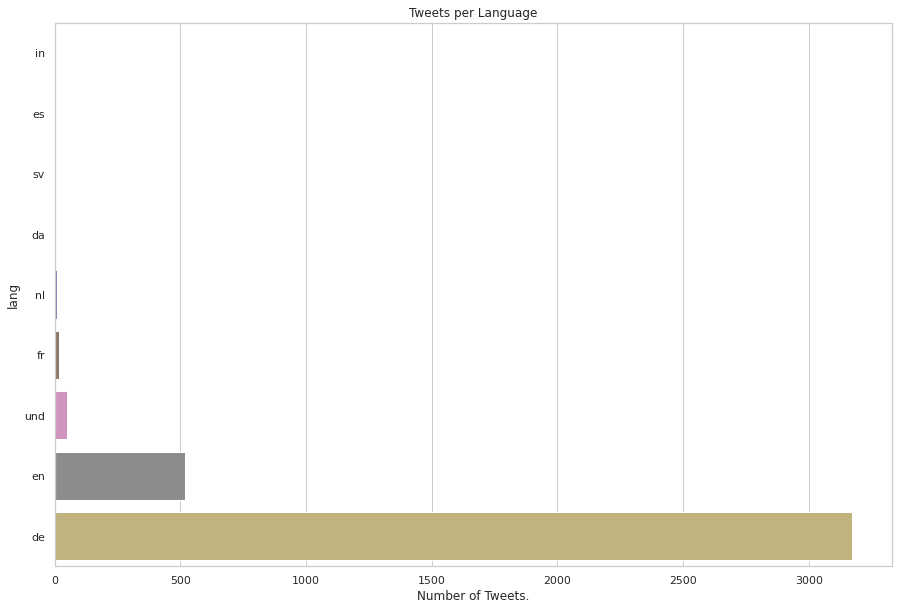

In [5]:
def bar_plot(value: str, df: pd.DataFrame, title: str, x_label: str="", save: bool = False):
    """
    Creates a bar-plot by counting the occurrences of a given value.
    
    :param save: Whether to save the created figure.
    :param value: The value to plot.
    :param df: The Dataframe with the values.
    :param title: The title of the dataframe.
    :param x_label: The label for the x-axe. Default: the name of the plotted value.
    """
    plt.rcParams["figure.figsize"] = (15, 10)
    sns.barplot(data=df.groupby(by=value, as_index=False).count()[[value, "id"]].sort_values(by="id"), y=value, x="id", orient='h')
    if x_label != "":
        plt.xlabel(x_label)
    plt.title(title)
    if save:
        plt.savefig("vis/{}.png".format(title.replace(' ', '_')))
    plt.show()

bar_plot("source", tweets_data, "Tweets per Source", "Number of Tweets.", save=True)
bar_plot("lang", tweets_data, "Tweets per Language", "Number of Tweets.")

In [6]:
def str_to_dict(string_dict: str) -> dict:
    """
    Converts a string from type {'A': 0, 'B': 1, 'C': 2} into a dict object.
    
    :param string_dict: The string to convert.
    :return: The dictionary.
    """
    if type(string_dict) is dict:
        string_dict: dict
        return string_dict
    values = string_dict.strip('{').strip('}').split(', ')
    output_dict = {}
    for val in values:
        val = val.split(': ')
        output_dict[val[0].strip("'")] = int(val[1])
    return output_dict


public_metrics_users = pd.DataFrame(list(map(str_to_dict, tweets_user["public_metrics"].tolist())))
public_metrics_users.loc[:10]

,followers_count,following_count,tweet_count,listed_count
0,16641,1170,64026,153
1,957,118,293,36
2,1670,965,8608,79
3,2158,1705,9376,90
4,1076,1928,18497,84
5,768,207,847,11
6,814,769,4188,20
7,424,462,174342,18
8,798,640,2523,28
9,123,109,200,0


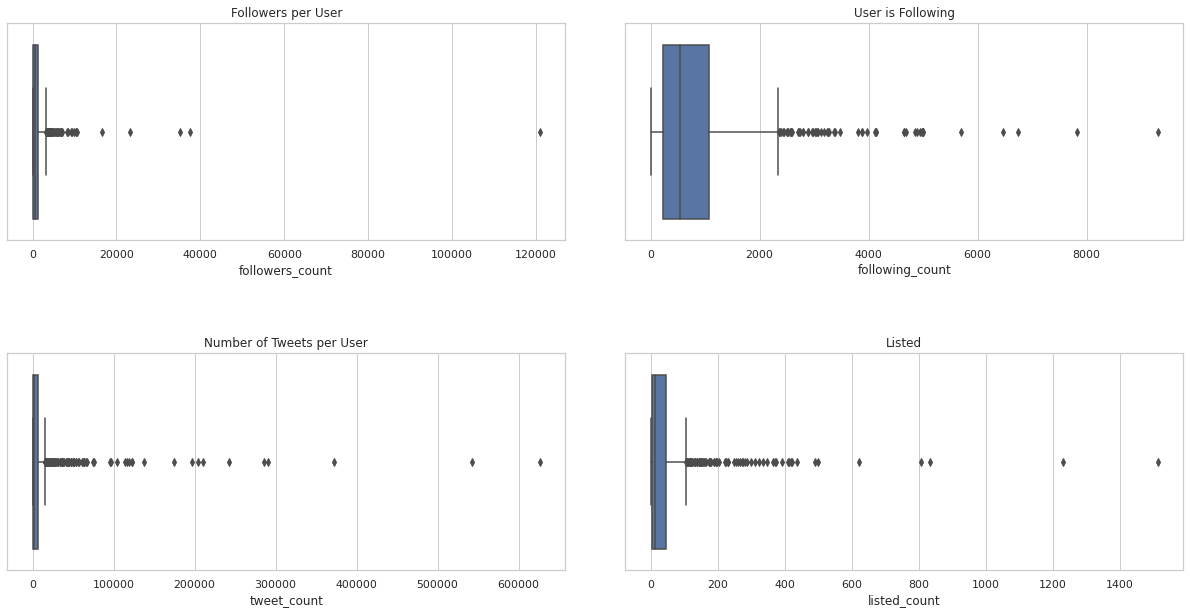

In [7]:
vis_users = []


plt.rcParams["figure.figsize"] = (12, 8)

plt.rcParams["figure.figsize"] = (18, 10)
fig, axes = plt.subplots(2,2)
sns.boxplot(data = public_metrics_users, x ="followers_count", orient="h", ax = axes[0][0])
sns.boxplot(data = public_metrics_users, x ="following_count", orient="h", ax = axes[0][1])
sns.boxplot(data = public_metrics_users, x ="tweet_count", orient="h", ax = axes[1][0])
sns.boxplot(data = public_metrics_users, x ="listed_count", orient="h", ax = axes[1][1])
axes[0][0].set_title("Followers per User")
axes[0][1].set_title("User is Following")
axes[1][0].set_title("Number of Tweets per User")
axes[1][1].set_title("Listed")
fig.tight_layout(pad=5)
plt.savefig("vis/user_information.png")
plt.show()

## Tweets over time ##
In the following cells I'll try to visualize the time information of the tweets.

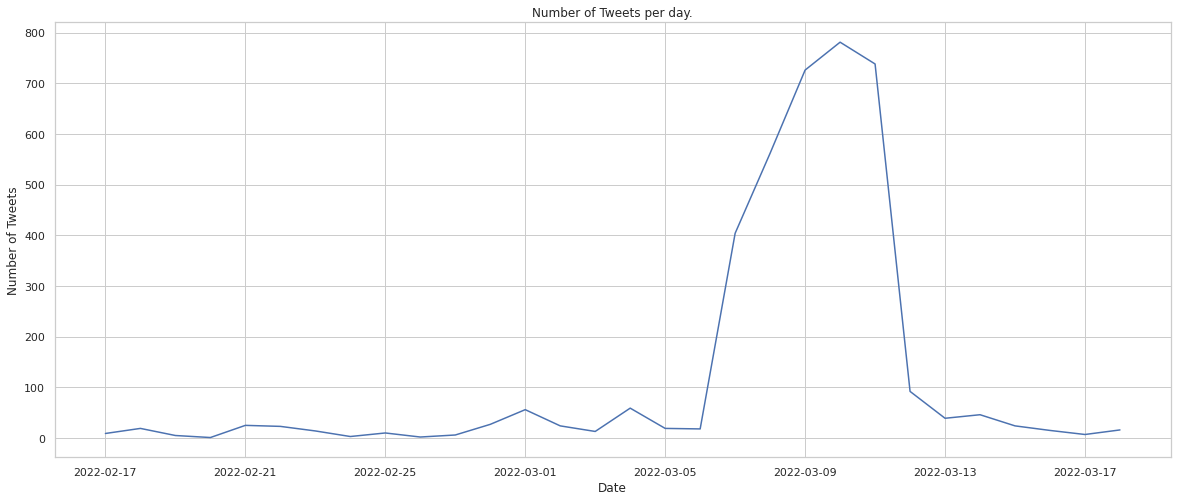

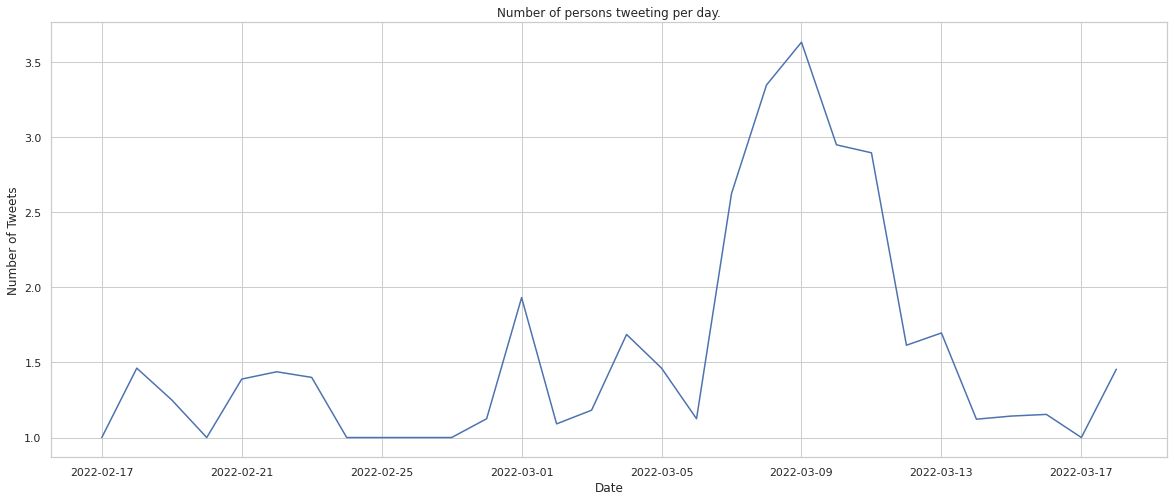

In [8]:
date_tweets = tweets_data['created_at'].sort_values().tolist()
start_date = datetime.datetime(date_tweets[0].year, date_tweets[0].month, date_tweets[0].day) # Date of the first Tweet
end_date = datetime.datetime(date_tweets[-1].year, date_tweets[-1].month, date_tweets[-1].day) # Date of the last Tweet
equal_day = lambda x, y: x.day == y.day and x.month == y.month and x.year == y.year
tweets_over_time = {}
date_delta = start_date
while date_delta <= end_date:
    tweets_over_time[date_delta] = [0, []]
    date_delta = date_delta + datetime.timedelta(days=1)
for _, v in tweets_data.iterrows():
    try:
        tweets_over_time[datetime.datetime(v['created_at'].year, v['created_at'].month, v['created_at'].day)][0] += 1
        tweets_over_time[datetime.datetime(v['created_at'].year, v['created_at'].month, v['created_at'].day)][1].append(v['author_id'])
    except KeyError:
        continue
tweets_over_time = [(i, tweets_over_time[i][0], len(set(tweets_over_time[i][1]))) for i in tweets_over_time.keys()]
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot([i[0] for i in tweets_over_time], [i[1] for i in tweets_over_time])
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per day.')
plt.savefig("vis/Number_of_tweets_per_day.png")
plt.show()
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of persons tweeting per day.')
plt.plot([i[0] for i in tweets_over_time], [i[1]/i[2] for i in tweets_over_time])
plt.show()

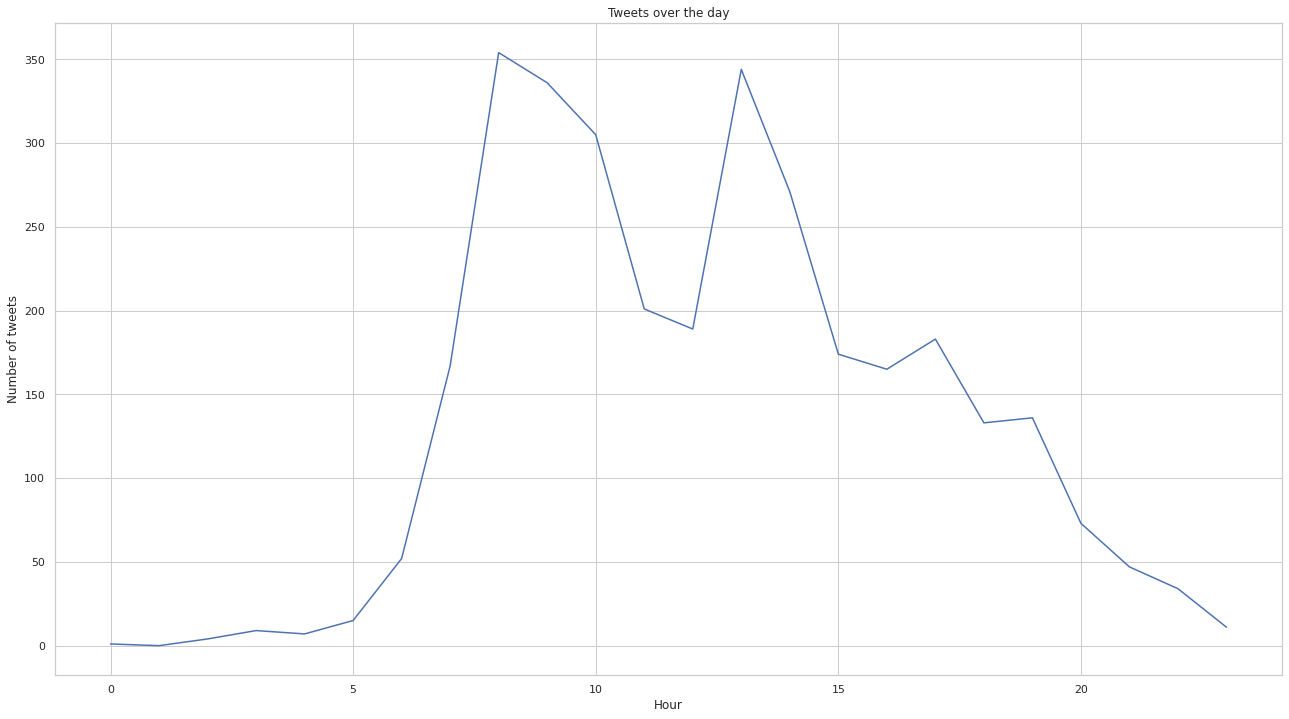

In [9]:
time_of_day = {i: 0 for i in range(0, 24)}
for _, v in tweets_data.loc[tweets_data.created_at > datetime.datetime(2022, 3, 6, 23, 59, 59)].loc[tweets_data.created_at < datetime.datetime(2022, 3, 12)].iterrows():
    time_of_day[v["created_at"].hour] += 1
plt.rcParams["figure.figsize"] = (22, 12)
plt.plot([i for i in time_of_day.keys()], [time_of_day[i] for i in time_of_day.keys()])
plt.title("Tweets over the day")
plt.xlabel("Hour")
plt.ylabel("Number of tweets")
plt.savefig("vis/Tweets_over_day.png")
plt.show()

In [46]:
tweets_before = list(filter(lambda x: x[0]<datetime.datetime(2022, 3, 7, 0, 0, 0), tweets_over_time))
tweets_tuesday = list(filter(lambda x: datetime.datetime(2022, 3, 8, 0, 0, 0) < x[0] < datetime.datetime(2022, 3, 8, 23, 59, 59), tweets_over_time))
print("Number of tweets per day before the conference: %s" % np.mean([i[1] for i in tweets_before]))
print("With a standard deviation of %s" % np.std([i[1] for i in tweets_before]))
print("Number of tweets per day during the conference: %s" % np.mean([i[1] for i in tweets_during]))
print("With a standard deviation of %s" % np.std([i[1] for i in tweets_during]))

Number of tweets per day before the conference: 18.5
With a standard deviation of 15.95566774952817
Number of tweets per day during the conference: 701.75
With a standard deviation of 83.23573451348885


In [39]:
print("Number of authors tweeting per day before the conference: %s" % np.mean([i[2] for i in tweets_before]))
print("With a standard deviation of %s" % np.std([i[2] for i in tweets_before]))
print("Number of authors tweeting per day during the conference: %s" % np.mean([i[2] for i in tweets_during]))
print("With a standard deviation of %s" % np.std([i[2] for i in tweets_during]))


Number of authors tweeting per day before the conference: 13.444444444444445
With a standard deviation of 9.172557030029076
Number of authors tweeting per day during the conference: 222.0
With a standard deviation of 39.805778474990284


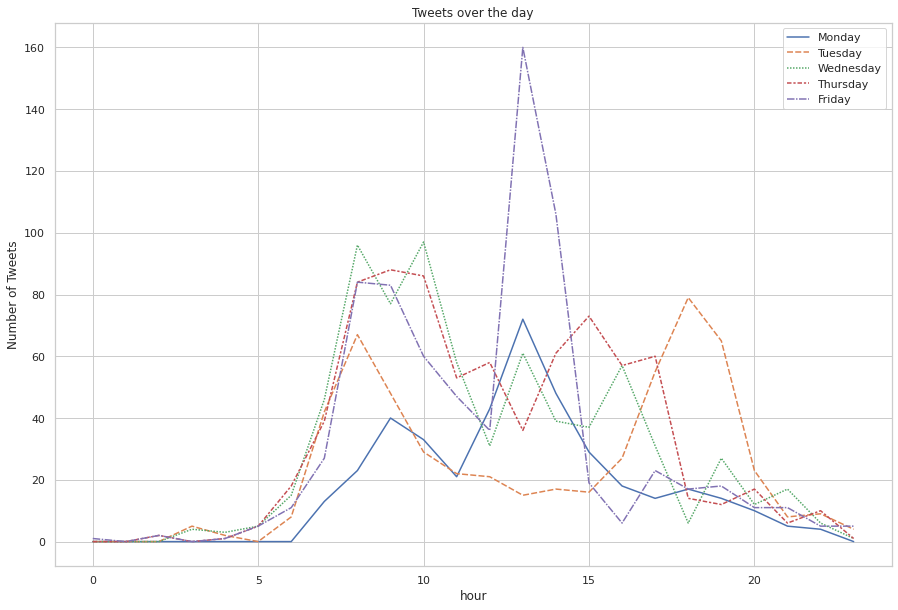

In [89]:
tweets_per_hour = {i: {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, } for i in range(0, 24)}
weekdays = list(tweets_per_hour[0].keys())
for i in range(7, 12):
    tweets_during = pd.DataFrame(map(lambda x: (x.hour, 1), filter(lambda x: datetime.datetime(2022, 3, i, 0, 0, 0) < x < datetime.datetime(2022, 3, i, 23, 59, 59), tweets_data["created_at"].sort_values().tolist())), columns=["hour", "n"]).groupby(by="hour", as_index=False).count()
    for _,v in tweets_during.iterrows():
        tweets_per_hour[v["hour"]][weekdays[i-7]] = v["n"]
tweets_during = pd.DataFrame(tweets_per_hour).T
plt.rcParams["figure.figsize"] = (15, 10)
sns.lineplot(data=tweets_during)
plt.title("Tweets over the day")
plt.xlabel("hour")
plt.ylabel("Number of Tweets")
plt.savefig("vis/Tweets_over_day_during_DHd.png")
plt.show()

In [91]:
tweets_during["Friday"]

0       1
1       0
2       2
3       0
4       1
5       5
6      11
7      27
8      84
9      83
10     60
11     47
12     36
13    160
14    106
15     19
16      6
17     23
18     17
19     18
20     11
21     11
22      5
23      5
Name: Friday, dtype: int64